Question : Problem Statement
*** The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.***

1.Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2.For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df[df['Gender']=='Male'].shape[0]


104

Aerofit Shape

In [ ]:
print(f'aerofit has {df.shape[0]} rows  and {df.shape[1]} columns')

aerofit has 180 rows  and 9 columns


Technical Info of Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Statistical** description of dataset

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Checking missing Value


In [ ]:
df_missing = df.isnull().sum()
df_missing

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Unique **Products**

In [ ]:
no_unique_products = df['Product'].nunique()
print(f"aerofit has {no_unique_products}  of uniques products")


aerofit has 3  of uniques products


In [ ]:
name_of_unique_products = df['Product'].unique()
print(f"names of unique products are {name_of_unique_products}")

names of unique products are ['KP281' 'KP481' 'KP781']


In [ ]:
number_of_male = df[df['Gender']=='Male'].shape[0]
male_choosing_kP781 = df[(df['Gender']=='Male') & (df['Product']=='KP781')].count()[0]

probability = male_choosing_kP781/number_of_male
print(number_of_male)
print(male_choosing_kP781)
print(f"Probability for male customers going for KP781 is {probability}")

104
33
Probability for male customers going for KP781 is 0.3173076923076923


Univariate Analysis

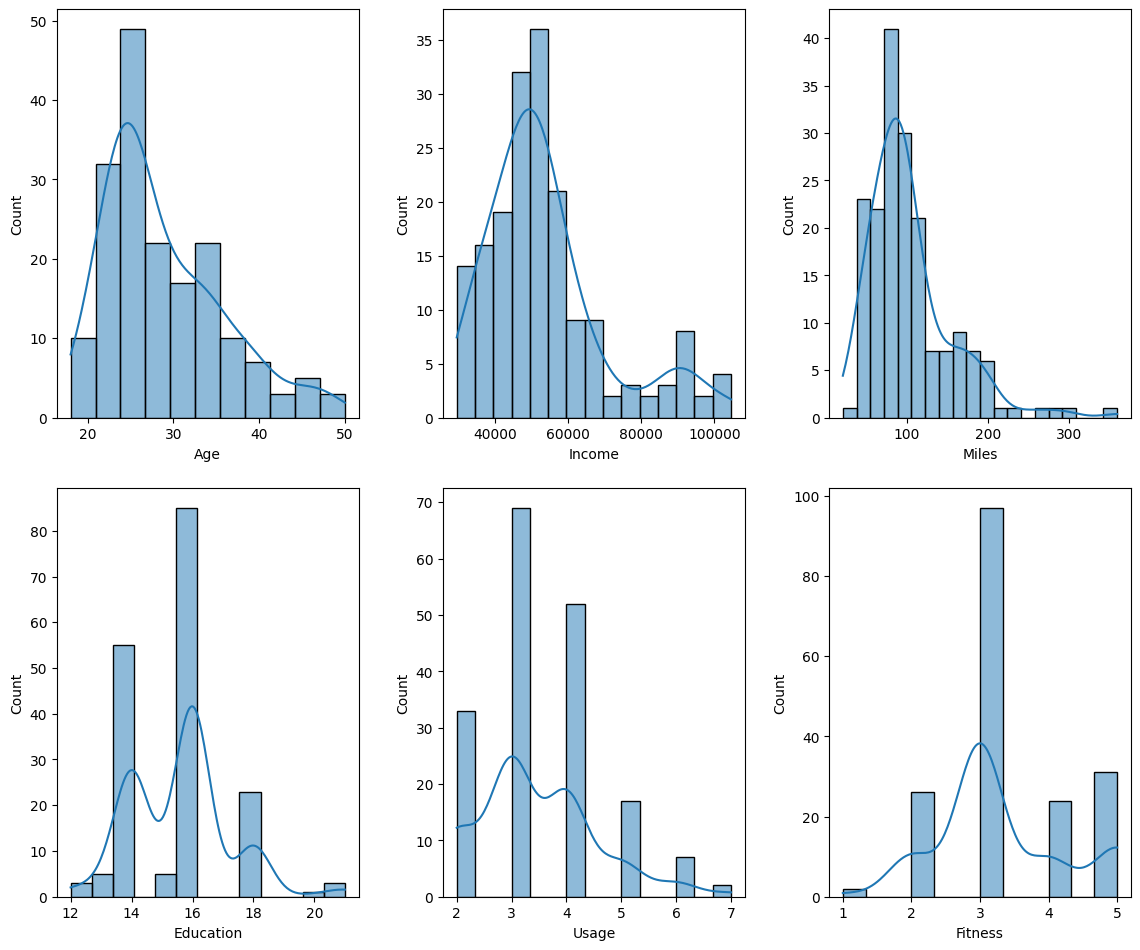

In [ ]:
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(12,10))
fig.tight_layout(pad=3)
sns.histplot(data=df,x='Age',ax=axis[0,0],kde=True)
sns.histplot(data=df,x='Income',ax=axis[0,1],kde=True)
sns.histplot(data=df,x='Miles',ax=axis[0,2],kde=True)
sns.histplot(data=df,x='Education',ax=axis[1,0],kde=True)
sns.histplot(data=df,x='Usage',ax=axis[1,1],kde=True)
sns.histplot(data=df,x='Fitness',ax=axis[1,2],kde=True)
plt.show()

Detect Outliers

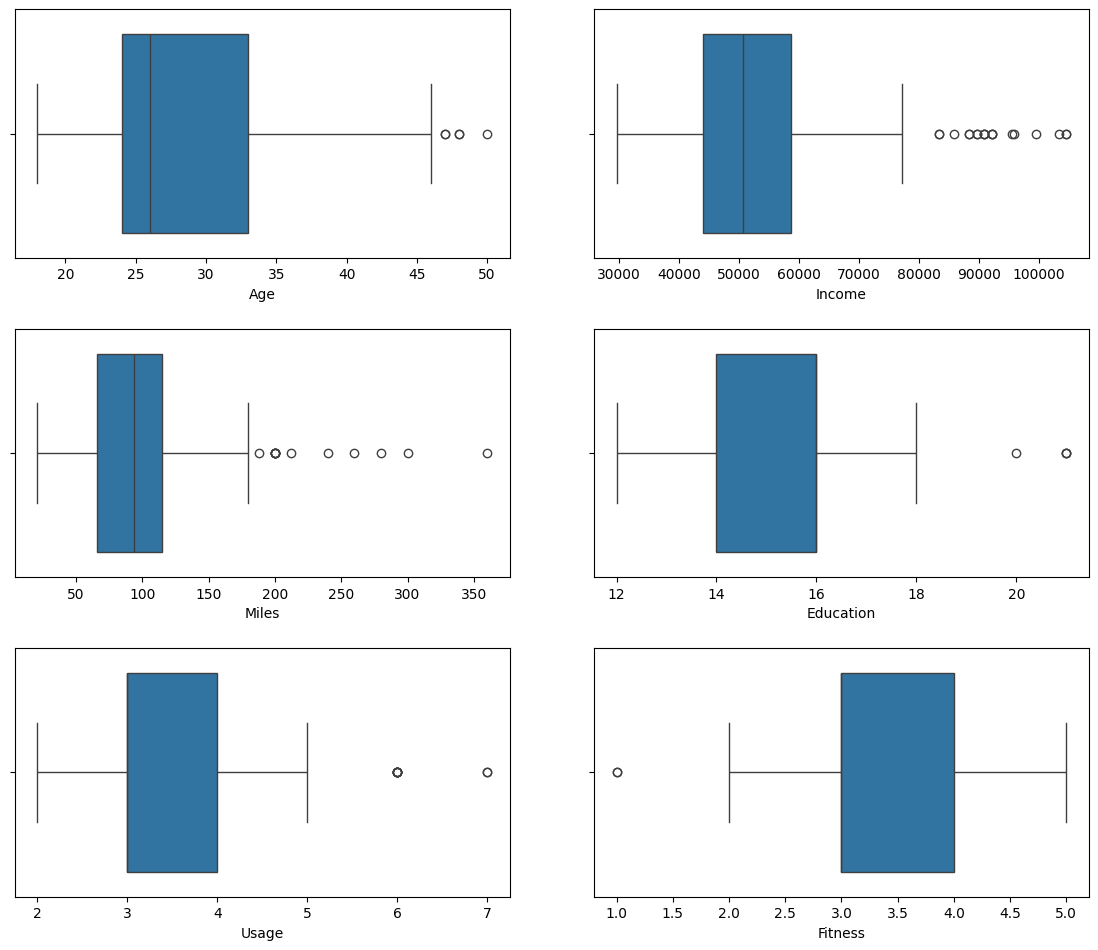

In [ ]:
fig,axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.tight_layout(pad=3)
sns.boxplot(data=df,x='Age',orient='h',ax=axis[0,0])
sns.boxplot(data=df,x='Income',orient='h',ax=axis[0,1])
sns.boxplot(data=df,x='Miles',orient='h',ax=axis[1,0])
sns.boxplot(data=df,x='Education',orient='h',ax=axis[1,1])
sns.boxplot(data=df,x='Usage',orient='h',ax=axis[2,0])
sns.boxplot(data=df,x='Fitness',orient='h',ax=axis[2,1])
plt.show()

In [ ]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
age_25=np.percentile(df['Age'],25)
age_25

24.0

In [ ]:
age_50=np.percentile(df['Age'],50)
age_50

26.0

In [ ]:
age_75=np.percentile(df['Age'],75)
age_75

33.0

In [ ]:
iqr_age=age_75-age_25
iqr_age

9.0

In [ ]:
upper_age_limit=age_75+1.5*iqr_age
upper_age_limit

46.5

In [ ]:
lower_age_limit= age_25-1.5*iqr_age
lower_age_limit

10.5

It means that any value above 46.5 will be considered as an outlier in case of
age.And Lower age limit is 10.5

In [ ]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [ ]:
education_25=np.percentile(df['Education'],25)
education_25

14.0

In [ ]:
education_50=np.percentile(df['Education'],50)
education_50

16.0

In [ ]:
education_75=np.percentile(df['Education'],75)
education_75

16.0

In [ ]:
iqr_education=education_75-education_25
iqr_education

2.0

In [ ]:
upper_education_limit = education_75+1.5*iqr_education
upper_education_limit

19.0

In [ ]:
lower_education_limit = education_25-1.5*iqr_education
lower_education_limit

11.0

It means any value above 19.0 will be considered as outlier and below 11.0 will also be consider as outlier

In [ ]:
df['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [ ]:
treadmill_use_25 = np.percentile(df['Usage'],25)
treadmill_use_25

3.0

In [ ]:
treadmill_use_50 = np.percentile(df['Usage'],50)
treadmill_use_50

3.0

In [ ]:
treadmill_use_75 = np.percentile(df['Usage'],75)
treadmill_use_75

4.0

In [ ]:
treadmill_iqr = treadmill_use_75-treadmill_use_25
treadmill_iqr

1.0

In [ ]:
upper_usage_limit = treadmill_use_75 + 1.5*treadmill_iqr
upper_usage_limit

5.5

In [ ]:
lower_usage_limit = treadmill_use_25 - 1.5*treadmill_iqr
lower_usage_limit

1.5

In this case value greater than 5.5 is considered as outliers and lower than 1.5 is also considered as outliers

In [ ]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [ ]:
income_25 = np.percentile(df['Income'],25)
income_25

44058.75

In [ ]:
income_50 = np.percentile(df['Income'],50)
income_50

50596.5

In [ ]:
income_75 = np.percentile(df['Income'],75)
income_75

58668.0

In [ ]:
iqr_income = income_75 - income_25
iqr_income

14609.25

In [ ]:
upper_limit_income = income_75 + 1.5*iqr_income
upper_limit_income

80581.875

In [ ]:
lower_limit_income = income_25 - 1.5*iqr_income
lower_limit_income

22144.875

In this case the value above 80581 are considered as outliers and value below 22144 is also considered as outliers

In [ ]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [ ]:
mile_25 = np.percentile(df['Miles'],25)
mile_25

66.0

In [ ]:
mile_50 = np.percentile(df['Miles'],50)
mile_50

94.0

In [ ]:
mile_75 = np.percentile(df['Miles'],75)
mile_75

114.75

In [ ]:
iqr_mile = mile_75 - mile_25
iqr_mile

48.75

In [ ]:
upper_limit_mile = mile_75 + 1.5*iqr_mile
upper_limit_mile

187.875

In [ ]:
lower_limit_mile = mile_25 - 1.5*iqr_mile
lower_limit_mile

-7.125

Outlier :- More number of outliers are seen in miles and Income . While Age,Education and Usuage have comparitively less outlier values

Undertanding the distribution of data for the qualitative attributes


1.   Product
2.   Gender
3.  Marital Status



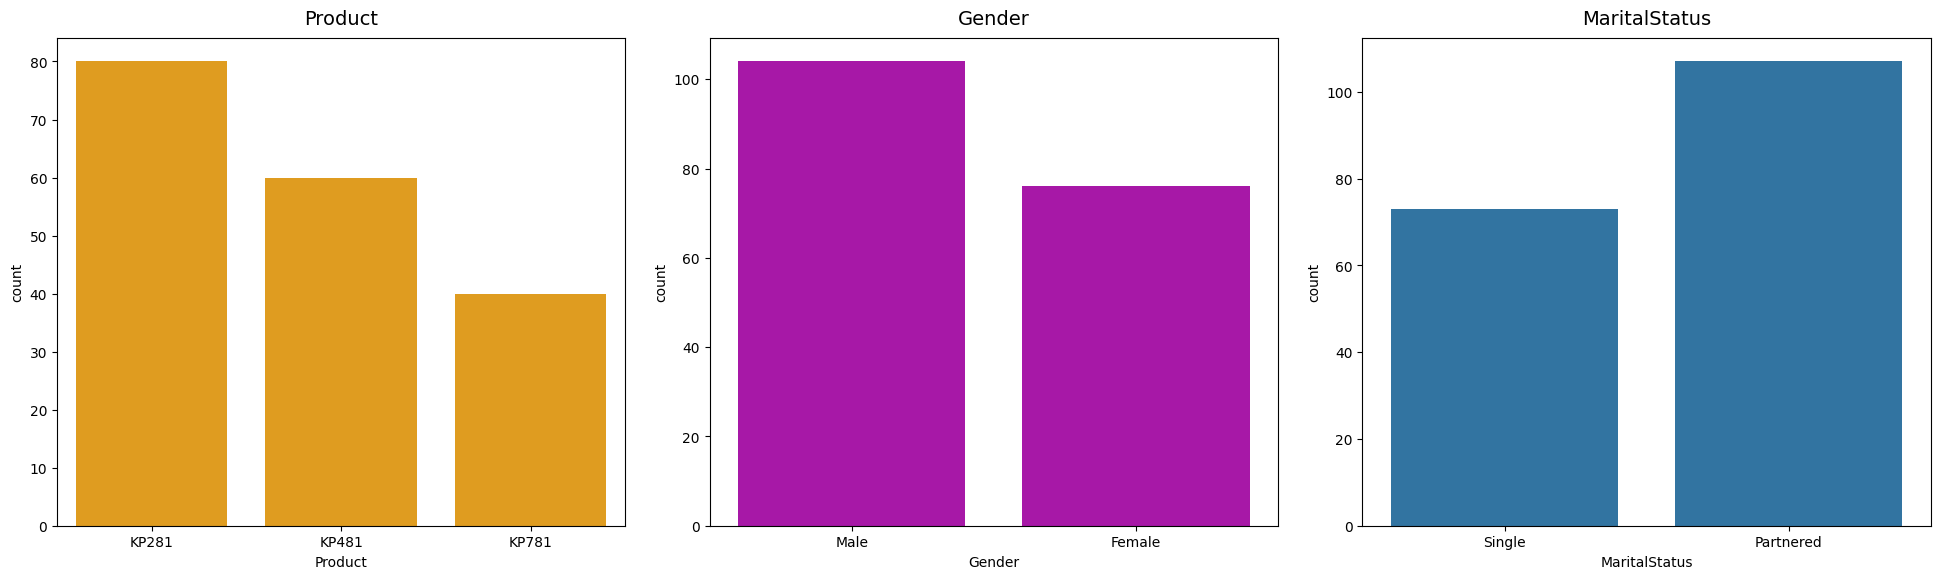

In [ ]:
fig,axis = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
fig.tight_layout(pad=3)
sns.countplot(data=df,x='Product',ax=axis[0],color='orange')
sns.countplot(data=df,x='Gender',ax=axis[1],color='m')
sns.countplot(data=df,x='MaritalStatus',ax=axis[2])

axis[0].set_title('Product',fontsize=14,pad=10)
axis[1].set_title('Gender',fontsize=14,pad=10)
axis[2].set_title('MaritalStatus',fontsize=14,pad=10)
plt.show()

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
normalised_data = df1.groupby(['variable', 'value'])[['value']].count() / len(df)
normalised_data.rename(columns={'value': 'percentage'})
normalised_data

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

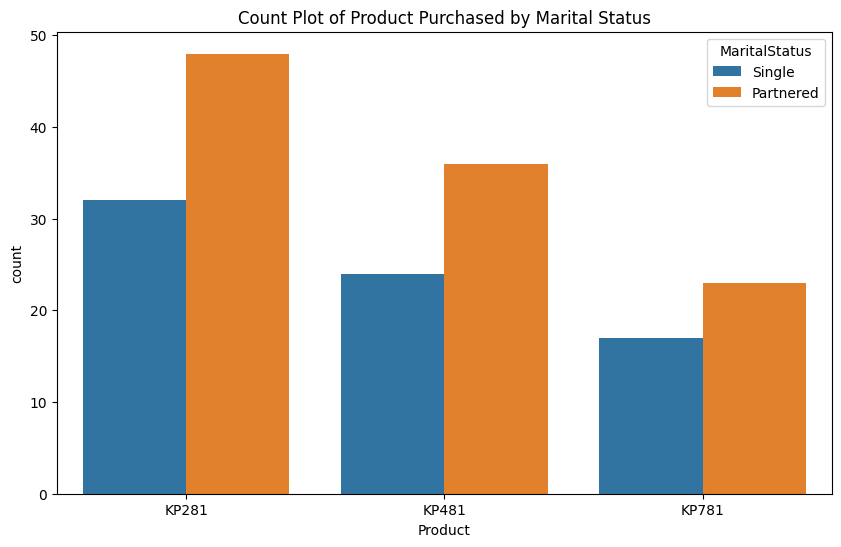

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Count Plot of Product Purchased by Marital Status')
plt.show()


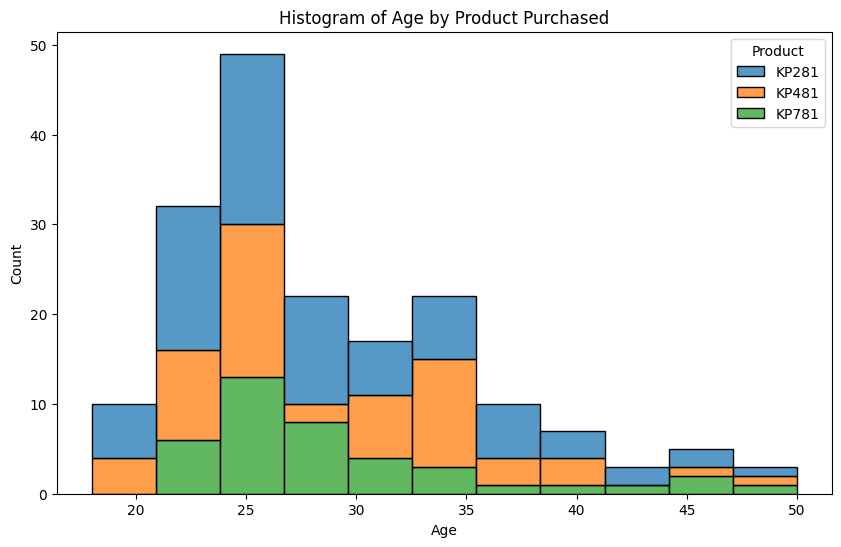

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Product', multiple='stack')
plt.title('Histogram of Age by Product Purchased')
plt.show()


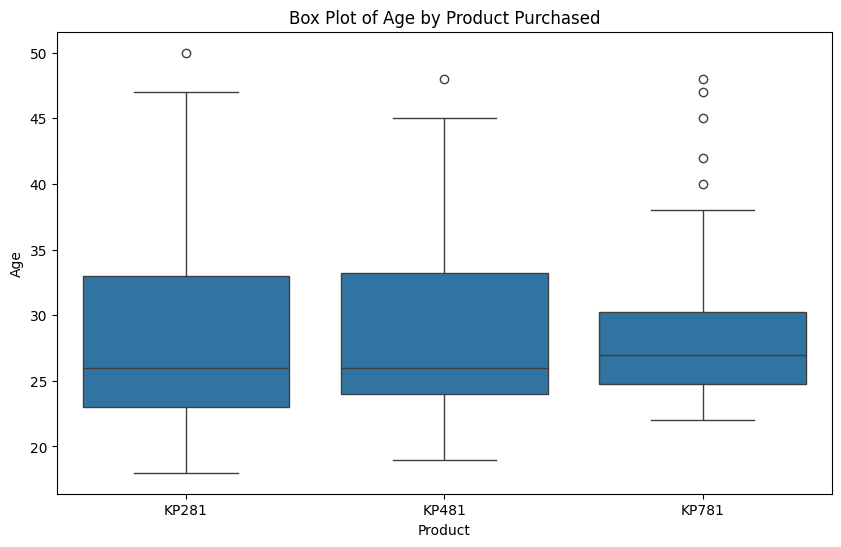

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Box Plot of Age by Product Purchased')
plt.show()

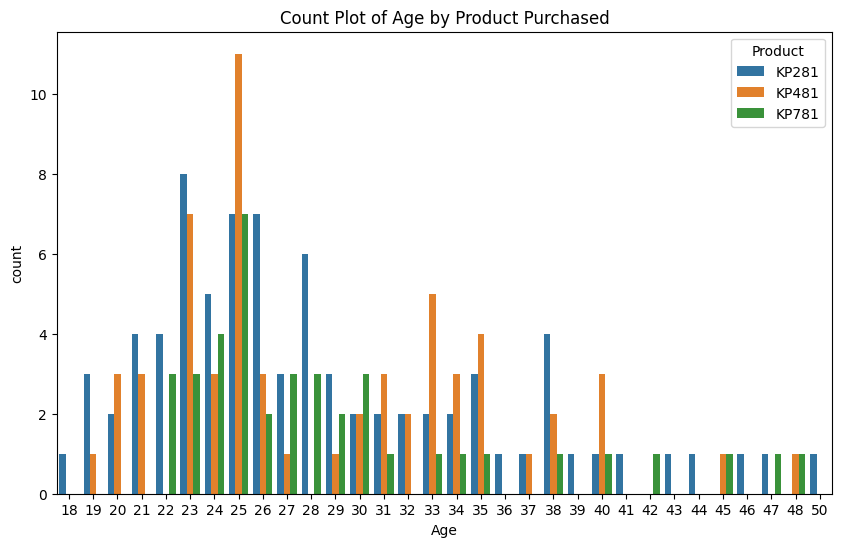

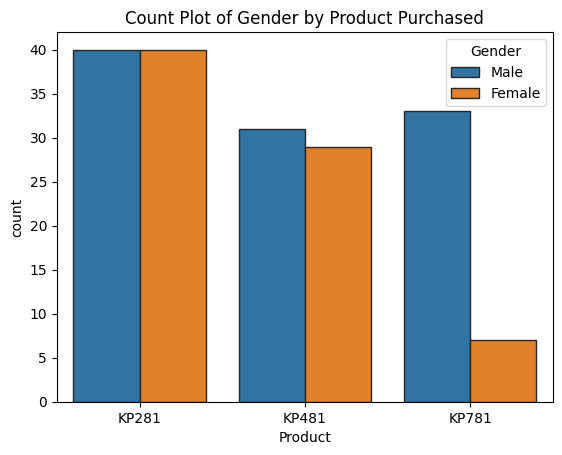

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age',hue='Product')
plt.title('Count Plot of Age by Product Purchased')
plt.show()

sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15")

plt.title('Count Plot of Gender by Product Purchased')
plt.show()

It can be seen that equal number of males and females have bought Kp281 and almost same for product KP481
-But for KP781 most male members have purchased it.

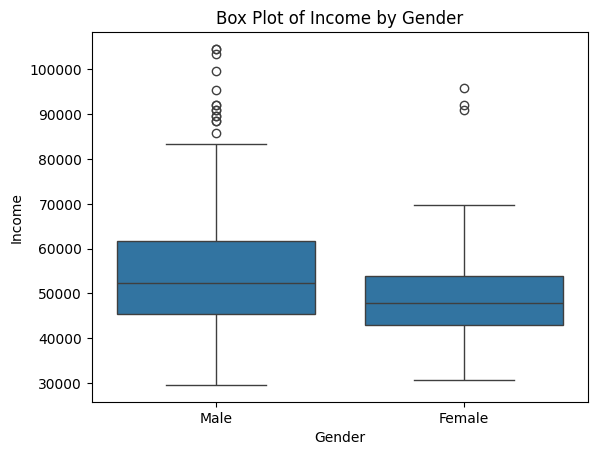

In [ ]:
sns.boxplot(data=df,x='Gender',y='Income')
plt.title('Box Plot of Income by Gender')
plt.show()

Let us check the effect of features on product purchased
Features  are Age,Education,Usuage,Fitness,Income,Miles

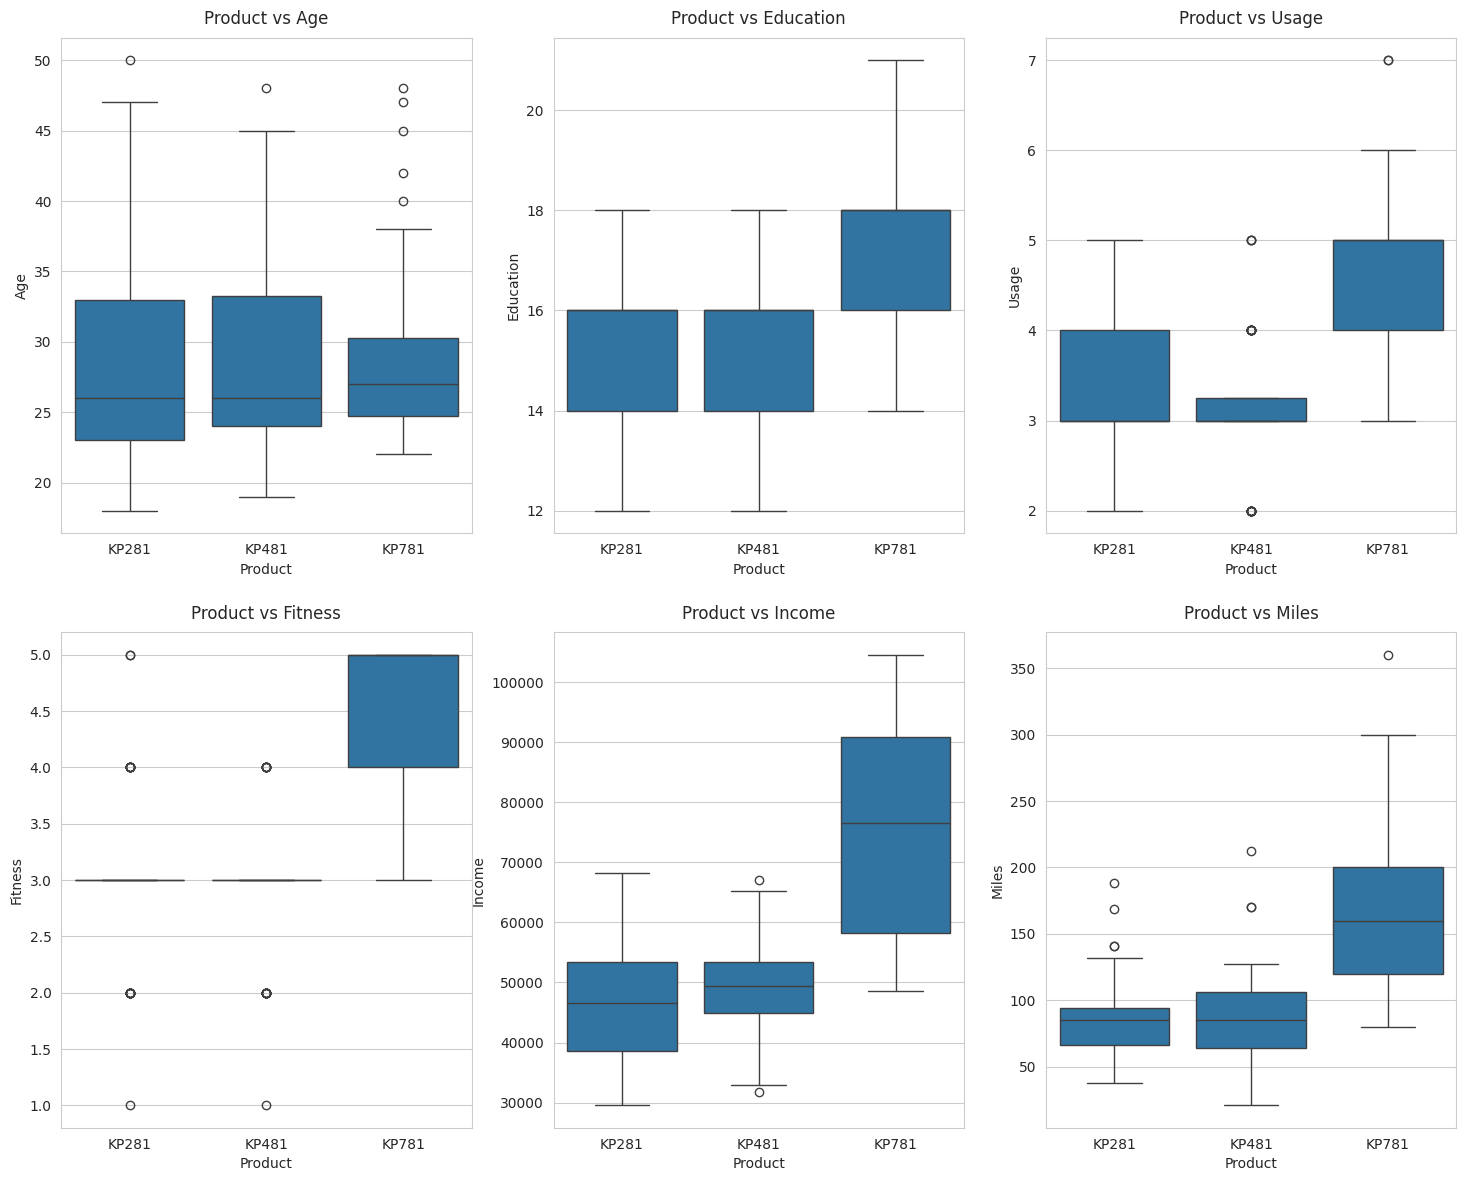

In [ ]:
attrs = ['Age','Education','Usage','Fitness','Income','Miles']
sns.set_style('whitegrid')
fig,axis = plt.subplots(nrows=2,ncols=3,figsize=(18,10))
fig.subplots_adjust(top=1.2)
count=0
for i in range(2):
  for j in range(3):
    sns.boxplot(data=df,x='Product',y=attrs[count],ax=axis[i,j])
    axis[i,j].set_title(f"Product vs {attrs[count]}", pad = 10,fontsize=12)
    count+=1
plt.show()

#Insights
Product vs Age:
-->People of same age group goes for kp281 and kp481
-->where as people going for Kp781 are more between 22 to 38
Product vs Education:
-->It can be seen customers who have more than 16yrs of educations tend to go for KP781 more
Product vs Usauge:-
--->It can be seen that customers who tend to use treadmill
greater than 4times a week , are more likely to purchase KP781 product
Product vs Fitness
-->It can be seen more customer is fit(fitness>3) higher chances of purchasing KP781
Product vs Income
--> Higher income of the customer(Income>=6000)higher than chances of customer to purchase the Kp781 product.
Product vs Miles
--> If the customer wants to walk/run greater than 120 miles per week . It is more likely they will buy Kp781 product

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:

crosstab = pd.crosstab(index=df['Product'], columns='count')

# Calculating the percentage of each product purchased
crosstab['percentage'] = (crosstab['count'] / crosstab['count'].sum()) * 100

# Display the crosstab with percentages
print(crosstab)


col_0    count  percentage
Product                   
KP281       80   44.444444
KP481       60   33.333333
KP781       40   22.222222


In [ ]:
crosstab = pd.crosstab(index=df['Gender'], columns='count')

# Calculating the percentage of each product purchased
crosstab['percentage'] = (crosstab['count'] / crosstab['count'].sum()) * 100

# Display the crosstab with percentages
print(crosstab)

col_0   count  percentage
Gender                   
Female     76   42.222222
Male      104   57.777778


In [ ]:
crosstab = pd.crosstab(index=df['Age'], columns='count')

# Calculating the percentage of each product purchased
crosstab['percentage'] = (crosstab['count'] / crosstab['count'].sum()) * 100

# Display the crosstab with percentages
print(crosstab)

col_0  count  percentage
Age                     
18         1    0.555556
19         4    2.222222
20         5    2.777778
21         7    3.888889
22         7    3.888889
23        18   10.000000
24        12    6.666667
25        25   13.888889
26        12    6.666667
27         7    3.888889
28         9    5.000000
29         6    3.333333
30         7    3.888889
31         6    3.333333
32         4    2.222222
33         8    4.444444
34         6    3.333333
35         8    4.444444
36         1    0.555556
37         2    1.111111
38         7    3.888889
39         1    0.555556
40         5    2.777778
41         1    0.555556
42         1    0.555556
43         1    0.555556
44         1    0.555556
45         2    1.111111
46         1    0.555556
47         2    1.111111
48         2    1.111111
50         1    0.555556


Checking for correlation between features

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df1 = df.copy()
df1['MaritalStatus'] = df1['MaritalStatus'].astype('category').cat.codes
df1['Gender'] = df1['Gender'].astype('category').cat.codes
df1['Product'] = df1['Product'].astype('category').cat.codes
correlation_matrix = df1.corr()


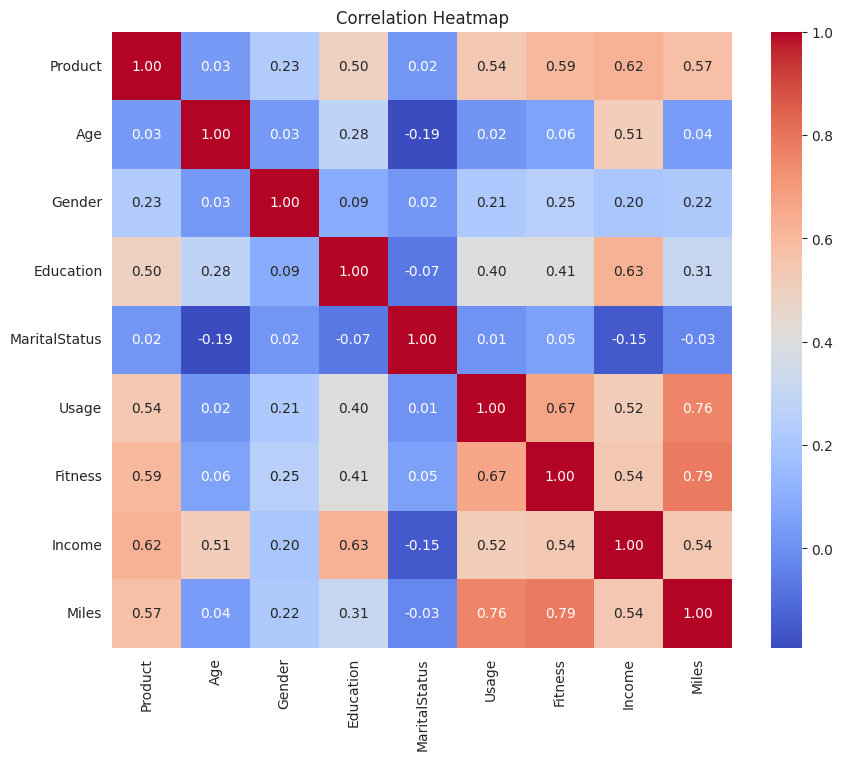

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x800 with 0 Axes>

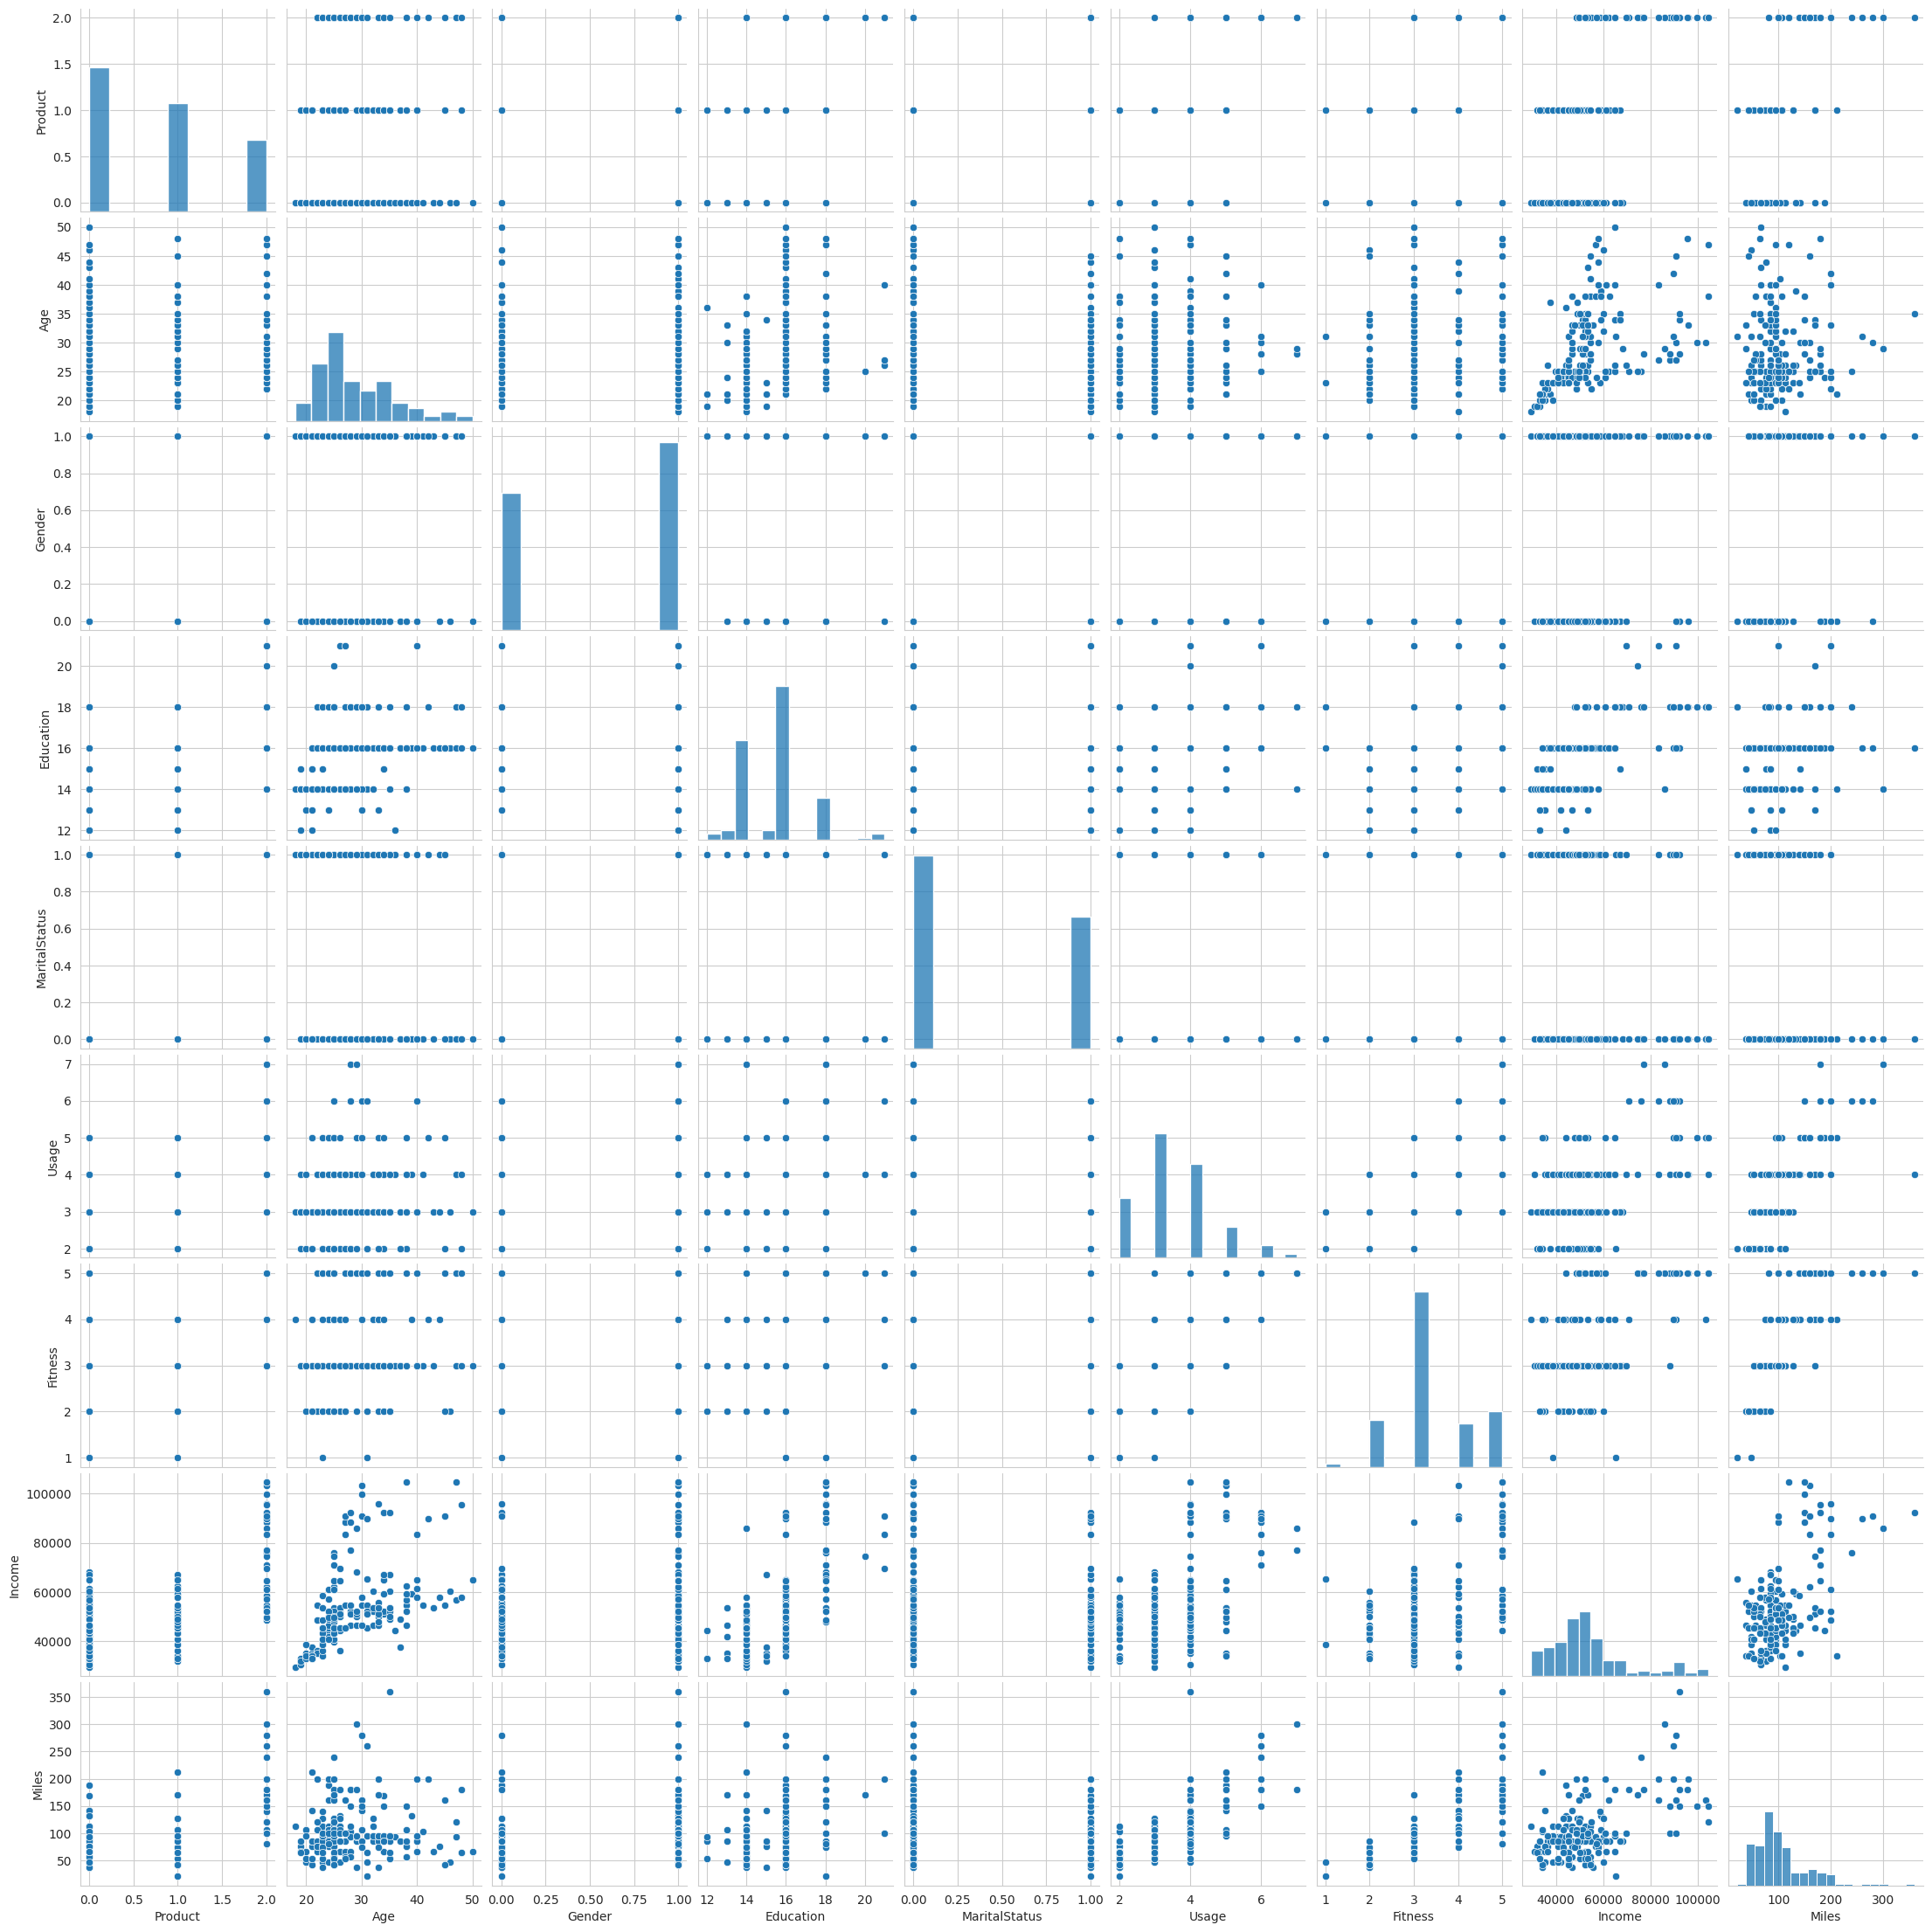

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(df1)
plt.show()

## **Customer Profiling **

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df_kp1 = df[df['Product']=='KP281']
df_kp2 = df[df['Product']=='KP481']
df_kp3 = df[df['Product']=='KP781']

For Product KP1

In [ ]:
df_kp1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


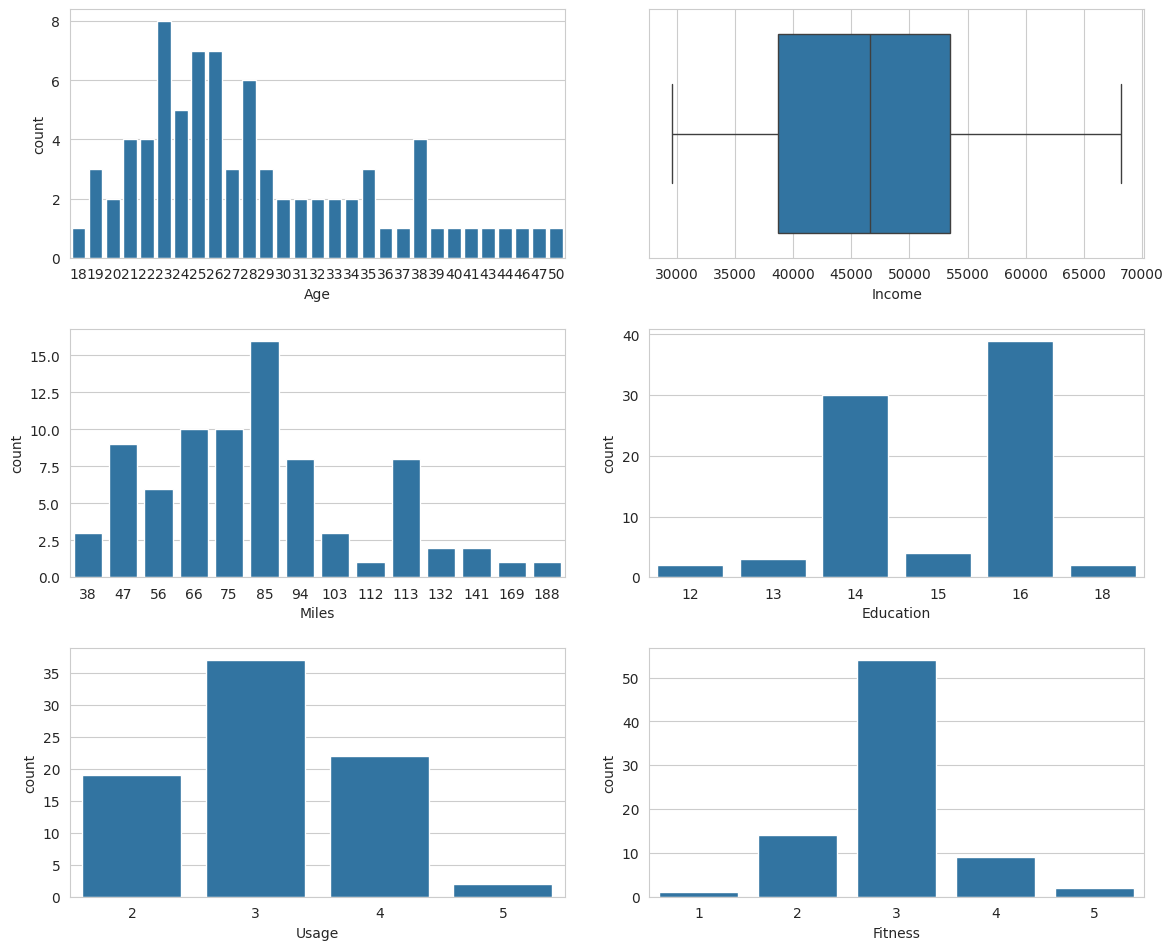

In [ ]:
fig,axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.tight_layout(pad=3)
sns.countplot(data=df_kp1,x='Age',ax=axis[0,0])
sns.boxplot(data=df_kp1,x='Income',ax=axis[0,1])
sns.countplot(data=df_kp1,x='Miles',ax=axis[1,0])
sns.countplot(data=df_kp1,x='Education',ax=axis[1,1])
sns.countplot(data=df_kp1,x='Usage',ax=axis[2,0])
sns.countplot(data=df_kp1,x='Fitness',ax=axis[2,1])
plt.show()

Insights:- MAximum people using KP281 are of 23,25,26.Hence in 20s .But we can also see the usage is widely spread in all age

In [ ]:
crosstab = pd.crosstab(index=df_kp1['Gender'], columns='count')

# Calculating the percentage of each product purchased
crosstab['percentage'] = (crosstab['count'] / crosstab['count'].sum()) * 100

# Display the crosstab with percentages
print(crosstab)

col_0   count  percentage
Gender                   
Female     40        50.0
Male       40        50.0


In [ ]:
crosstab = pd.crosstab(index=df_kp1['Usage'], columns='count')

# Calculating the percentage of each product purchased
crosstab['percentage'] = (crosstab['count'] / crosstab['count'].sum()) * 100

# Display the crosstab with percentages
print(crosstab)

col_0  count  percentage
Usage                   
2         19       23.75
3         37       46.25
4         22       27.50
5          2        2.50


Insights:-
-->Maximum usage of people using KP281 is of 3 times a week.
-->Maximum customers using this product has Fitness 3.
-->Maximum customers using this product has income range of 40k to 54k
-->Maximum customers using this product walks 95 miles.
-->Customers buying this has equal ratio 50%.
-->Customers buying this are mostly of age 25.


Product KP481

In [ ]:
df_kp2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212


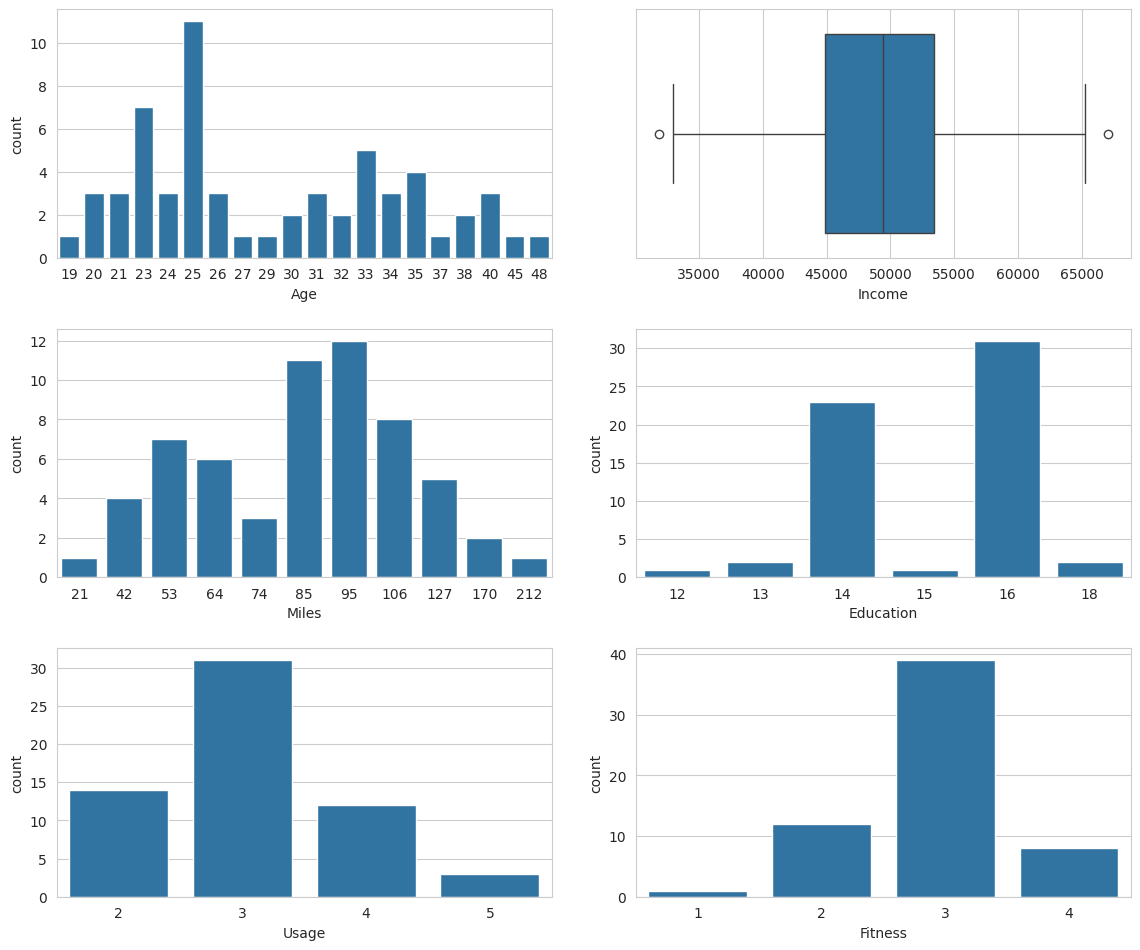

In [ ]:
fig,axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.tight_layout(pad=3)
sns.countplot(data=df_kp2,x='Age',ax=axis[0,0])
sns.boxplot(data=df_kp2,x='Income',ax=axis[0,1])
sns.countplot(data=df_kp2,x='Miles',ax=axis[1,0])
sns.countplot(data=df_kp2,x='Education',ax=axis[1,1])
sns.countplot(data=df_kp2,x='Usage',ax=axis[2,0])
sns.countplot(data=df_kp2,x='Fitness',ax=axis[2,1])
plt.show()

In [ ]:
crosstab = pd.crosstab(index=df_kp2['Gender'], columns='count')

# Calculating the percentage of each product purchased
crosstab['percentage'] = (crosstab['count'] / crosstab['count'].sum()) * 100

# Display the crosstab with percentages
print(crosstab)

col_0   count  percentage
Gender                   
Female     29   48.333333
Male       31   51.666667


# Insights:-
->Maximum usage is of 3 weeks for this KP481 also.
->Customers prefering this product has fitness levels 3.
->Maximum education is 16
->Maximum customers buying this product are of age 25
->Income range of maximum people buying this product is 45000 to 54000
->Maximum miles walked by customers using this product is 95.
-->It can be observed that customers buying this product has 31%male and 29%Female.














PRoduct KP781

In [ ]:
df_kp3.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


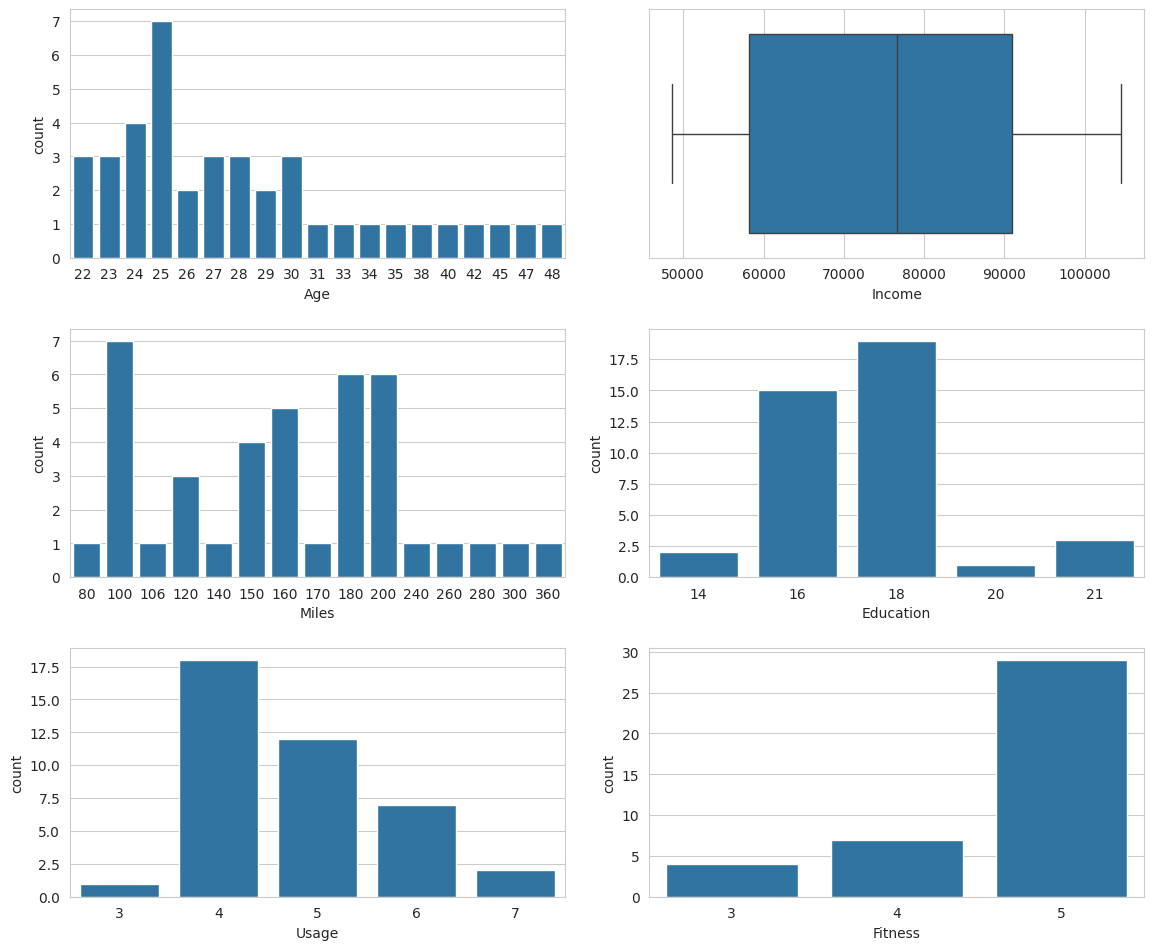

In [ ]:
fig,axis = plt.subplots(nrows=3,ncols=2,figsize=(12,10))
fig.tight_layout(pad=3)
sns.countplot(data=df_kp3,x='Age',ax=axis[0,0])
sns.boxplot(data=df_kp3,x='Income',ax=axis[0,1])
sns.countplot(data=df_kp3,x='Miles',ax=axis[1,0])
sns.countplot(data=df_kp3,x='Education',ax=axis[1,1])
sns.countplot(data=df_kp3,x='Usage',ax=axis[2,0])
sns.countplot(data=df_kp3,x='Fitness',ax=axis[2,1])
plt.show()

In [ ]:
crosstab = pd.crosstab(index=df_kp3['Gender'], columns='count')

# Calculating the percentage of each product purchased
crosstab['percentage'] = (crosstab['count'] / crosstab['count'].sum()) * 100

# Display the crosstab with percentages
print(crosstab)

col_0   count  percentage
Gender                   
Female      7        17.5
Male       33        82.5


Insights:-
->It can be observed that income range of customers here is more of 60000 to 90000
-->It can be observed that maximum usage of the customer using this product is 4 times a week.
--->It can be observed that most customers has fitness 5
--->It can be observed that customers using this product walks 100 miles mostly
-->It can be observed that customer using this product has education more than 16
--->It can be seen 82.5% males and 17.5%Females purchased it.

Computation and marginal probability


In [ ]:
df['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [ ]:
def prob_given_gender(Gender,print_marginal=False):
  if Gender !='Female' and Gender != 'Male':
    raise ValueError("Gender must be 'Female' or 'Male'")
  df_res = pd.crosstab(index=df['Gender'],columns=[df['Product']])
  p_781 = df_res['KP781'][Gender]/df_res.loc[Gender].sum()
  p_481 = df_res['KP481'][Gender]/df_res.loc[Gender].sum()
  p_281 = df_res['KP281'][Gender]/df_res.loc[Gender].sum()

  if print_marginal:
    print(f"p(MALE):{df_res.loc['Male'].sum()/len(df):.2f}")
    print(f"p(FEMALE):{df_res.loc['Female'].sum()/len(df):.2f}")

  print(f"p(KP781/{Gender}):{p_781:.2f}")
  print(f"p(KP481/{Gender}):{p_481:.2f}")
  print(f"p(KP281/{Gender}):{p_281:.2f}")

prob_given_gender('Male',True)
prob_given_gender("Female")

p(MALE):0.58
p(FEMALE):0.42
p(KP781/Male):0.32
p(KP481/Male):0.30
p(KP281/Male):0.38
p(KP781/Female):0.09
p(KP481/Female):0.38
p(KP281/Female):0.53


**Observations **



1. Dataset has 180rows and 9 columns
2. Dataset has no missing values
3.minimum age of user is 18 and maximum age is 50
4.75% of people have age less than 33
5.minimum number of miles customer expects to walk is 21.000 and maximum is 360.000
6.Number of unique products are 3 and they are 'KP281','Kp481','Kp781'
7.Income and miles have more number of outlier values .Whereas Education,Usuage
and fitness have less outlier values.
8.It is seen from observation that product name KP281  is more opted by people.So we can say that there is more demand for entry level trademill
9.We can also observe that Male members occupies higher ratio compared to other group
10.More partnered members are present.
11.In Numerical terms if we say 44.4% people go for KP281,33.3% people go for KP481,22.22% people go for KP781
There are 57% male members and 42.3%  are female members
out of which out of which 59.44% are partnered and 40.5% are single.
12.It can be seen that equal number of males and females have bought Kp281 and almost same for product KP481
-But for KP781 most male members have purchased it.13.Most partnered members are purchasing products.
13.Probability for male customers going for KP781 is 31.4%
14.There is a positive correlation between age and income.
 - There is a negative correlation between age and usage.
 - There is a positive correlation between income and miles.
 - There is a positive correlation between education and fitness.
 - There is a negative correlation between usage and fitness.








Recommendations




* Spread awarness among users about other products and benefits
* Spread Fitness related awarness in females to increase their ratio of contribution in buying.
-Give offers on fitness products to attract more users.
   




